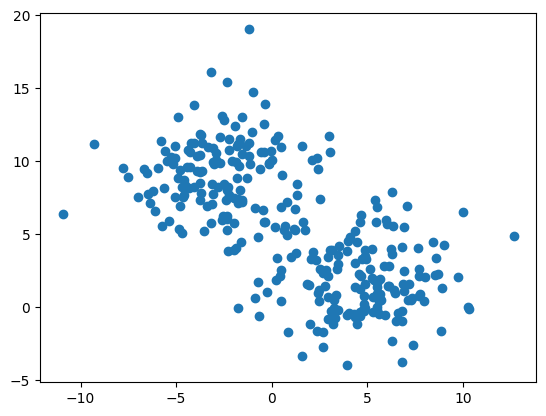

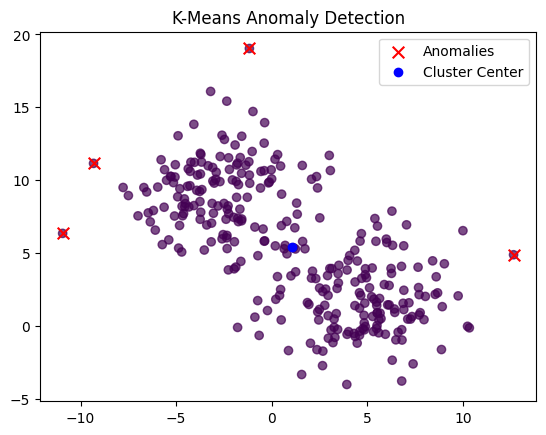

In [1]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with three clusters
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=2.6, random_state=42)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

# Fit k-means to the  data
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)

# Calculate distances of each point to the cluster center
cluster_distances = kmeans.transform(X)

# Number of outliers to identify
n_outlier = 4

# Calculate Euclidean distances and find the outliers
euclidean_distances = np.linalg.norm(cluster_distances, axis=1)
outlier_indices = np.argsort(euclidean_distances)[-n_outlier:]

# Plot the data points and cluster center
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.7)

# Highlight outliers with a different color
plt.scatter(X[outlier_indices, 0], X[outlier_indices, 1], marker='x', 
            s=70, c='red', label='Anomalies')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='o', c='blue', label='Cluster Center')
plt.title('K-Means Anomaly Detection')
plt.legend()
plt.show()